<a href="https://colab.research.google.com/github/gabriel9818/TareaDesarrollo/blob/main/Tarea/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

In [3]:
# Ubicacion del archivo de datos
url = '/content/drive/MyDrive/Colab Notebooks/Desarrollo/EpidemiasMundiales.csv' # external url?

In [4]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,N.º,Nombre,Inicio,Final,Patógeno,Muertes,Ref
0,0,1,Peste negra †,1347,1353,Yersinia pestis 2ª Plaga,100 Millones +,[1]
1,1,2,Pandemia de gripe de 1918 †,1918,1920,Influenzavirus A H1N1 - Mutación,100 Millones +,[1]
2,2,3,Pandemia de sida,1981,Presente,VIH,40 Millones +,[2]
3,3,4,Plaga de Justiniano †,541,549,Yersinia pestis 1ª Plaga,50 Millones +,[3]
4,4,5,Tercera plaga bubónica,1855,1960,Yersinia pestis 3ª Plaga,15 Millones +,[4]


In [5]:
# Visualizamos el DataFrame
data

,Unnamed: 0,N.º,Nombre,Inicio,Final,Patógeno,Muertes,Ref
0,0,1,Peste negra †,1347,1353,Yersinia pestis 2ª Plaga,100 Millones +,[1]
1,1,2,Pandemia de gripe de 1918 †,1918,1920,Influenzavirus A H1N1 - Mutación,100 Millones +,[1]
2,2,3,Pandemia de sida,1981,Presente,VIH,40 Millones +,[2]
3,3,4,Plaga de Justiniano †,541,549,Yersinia pestis 1ª Plaga,50 Millones +,[3]
4,4,5,Tercera plaga bubónica,1855,1960,Yersinia pestis 3ª Plaga,15 Millones +,[4]
5,5,6,Epidemia de cocolitzli de 1545,1545,1548,Salmonella enterica,12-15 Millones +,[5]
6,6,7,Epidemia de viruela en Tenochtitlán,1519,1520,Viruela,8.0 Millones +,[6]
7,7,8,Pandemia de COVID-19,2019,Presente,SARS-CoV-2,6.9 Millones +,[7]
8,8,9,Peste antonina,165,180,Desconocido,5.0 Millones +,[8]
9,9,10,Epidemia rusa de tifus,1918,1922,Rickettsia,3.0 Millones +,[9]


In [6]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1)
data

,N.º,Nombre,Inicio,Final,Patógeno,Muertes,Ref
0,1,Peste negra †,1347,1353,Yersinia pestis 2ª Plaga,100 Millones +,[1]
1,2,Pandemia de gripe de 1918 †,1918,1920,Influenzavirus A H1N1 - Mutación,100 Millones +,[1]
2,3,Pandemia de sida,1981,Presente,VIH,40 Millones +,[2]
3,4,Plaga de Justiniano †,541,549,Yersinia pestis 1ª Plaga,50 Millones +,[3]
4,5,Tercera plaga bubónica,1855,1960,Yersinia pestis 3ª Plaga,15 Millones +,[4]
5,6,Epidemia de cocolitzli de 1545,1545,1548,Salmonella enterica,12-15 Millones +,[5]
6,7,Epidemia de viruela en Tenochtitlán,1519,1520,Viruela,8.0 Millones +,[6]
7,8,Pandemia de COVID-19,2019,Presente,SARS-CoV-2,6.9 Millones +,[7]
8,9,Peste antonina,165,180,Desconocido,5.0 Millones +,[8]
9,10,Epidemia rusa de tifus,1918,1922,Rickettsia,3.0 Millones +,[9]


In [7]:
print("Columnas antes de la eliminación:")
print(data.columns)

Columnas antes de la eliminación:
Index(['N.º', 'Nombre', 'Inicio', 'Final', 'Patógeno', 'Muertes', 'Ref'], dtype='object')


In [8]:
# Elimina la última columna
data = data.iloc[:, :-1]

In [9]:
data

,N.º,Nombre,Inicio,Final,Patógeno,Muertes
0,1,Peste negra †,1347,1353,Yersinia pestis 2ª Plaga,100 Millones +
1,2,Pandemia de gripe de 1918 †,1918,1920,Influenzavirus A H1N1 - Mutación,100 Millones +
2,3,Pandemia de sida,1981,Presente,VIH,40 Millones +
3,4,Plaga de Justiniano †,541,549,Yersinia pestis 1ª Plaga,50 Millones +
4,5,Tercera plaga bubónica,1855,1960,Yersinia pestis 3ª Plaga,15 Millones +
5,6,Epidemia de cocolitzli de 1545,1545,1548,Salmonella enterica,12-15 Millones +
6,7,Epidemia de viruela en Tenochtitlán,1519,1520,Viruela,8.0 Millones +
7,8,Pandemia de COVID-19,2019,Presente,SARS-CoV-2,6.9 Millones +
8,9,Peste antonina,165,180,Desconocido,5.0 Millones +
9,10,Epidemia rusa de tifus,1918,1922,Rickettsia,3.0 Millones +


In [10]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   N.º       40 non-null     int64 
 1   Nombre    40 non-null     object
 2   Inicio    40 non-null     object
 3   Final     40 non-null     object
 4   Patógeno  40 non-null     object
 5   Muertes   40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [11]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,N.º
count,40.000000
mean,20.500000
std,11.690452
min,1.000000
25%,10.750000
50%,20.500000
75%,30.250000
max,40.000000


In [19]:
def fixMuertes(val):
    if isinstance(val, str):
        val = val.replace(' Millones', '').replace('+', '')
        if '-' in val:
            val_range = val.split('-')
            val = (float(val_range[0]) + float(val_range[1])) / 2
        else:
            val = float(val) * 1e6  # Convertir a millones
    return val

In [41]:
data['Muertes'] = data['Muertes'].apply(fixMuertes)


In [44]:
data['Inicio'] = pd.to_numeric(data['Inicio'], errors='coerce')
data['Final'] = pd.to_numeric(data['Final'], errors='coerce')

In [47]:
data['Final'] = data['Final'].fillna(2023)

In [48]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame
index_plaga_atenas = data[data['Nombre'] == 'Plaga de Atenas'].index[0]

# Reemplazar NaN por 425 en la columna 'Inicio'
data.at[index_plaga_atenas, 'Inicio'] = 425

# Reemplazar NaN por 250 en la columna 'Final'
data.at[index_plaga_atenas, 'Final'] = 250

In [49]:
data

,N.º,Nombre,Inicio,Final,Patógeno,Muertes
0,1,Peste negra †,1347.0,1353.0,Yersinia pestis 2ª Plaga,100000000.0
1,2,Pandemia de gripe de 1918 †,1918.0,1920.0,Influenzavirus A H1N1 - Mutación,100000000.0
2,3,Pandemia de sida,1981.0,2023.0,VIH,40000000.0
3,4,Plaga de Justiniano †,541.0,549.0,Yersinia pestis 1ª Plaga,50000000.0
4,5,Tercera plaga bubónica,1855.0,1960.0,Yersinia pestis 3ª Plaga,15000000.0
5,6,Epidemia de cocolitzli de 1545,1545.0,1548.0,Salmonella enterica,13.5
6,7,Epidemia de viruela en Tenochtitlán,1519.0,1520.0,Viruela,8000000.0
7,8,Pandemia de COVID-19,2019.0,2023.0,SARS-CoV-2,6900000.0
8,9,Peste antonina,165.0,180.0,Desconocido,5000000.0
9,10,Epidemia rusa de tifus,1918.0,1922.0,Rickettsia,3000000.0


In [50]:
data[['Inicio','Final','Muertes']].corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)


,Inicio,Final,Muertes
Inicio,1.00,1.00,0.23
Final,1.00,1.00,0.23
Muertes,0.23,0.23,1.00


In [51]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   N.º       40 non-null     int64  
 1   Nombre    40 non-null     object 
 2   Inicio    40 non-null     float64
 3   Final     40 non-null     float64
 4   Patógeno  40 non-null     object 
 5   Muertes   40 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.0+ KB


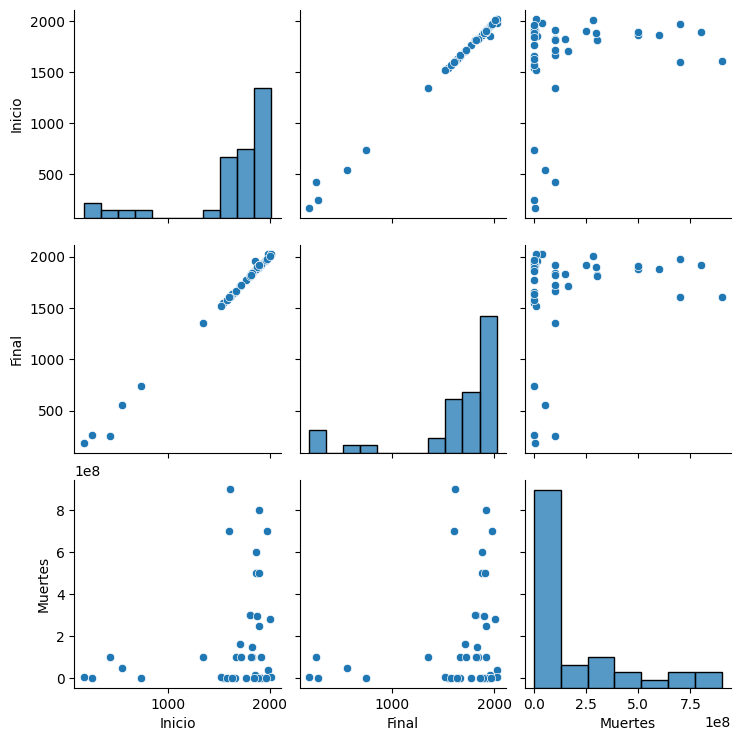

In [55]:
# Grafica de correlaciones respecto a los Estados
pair_plot = sns.pairplot(data[['Inicio', 'Final', 'Muertes']])
plt.show()


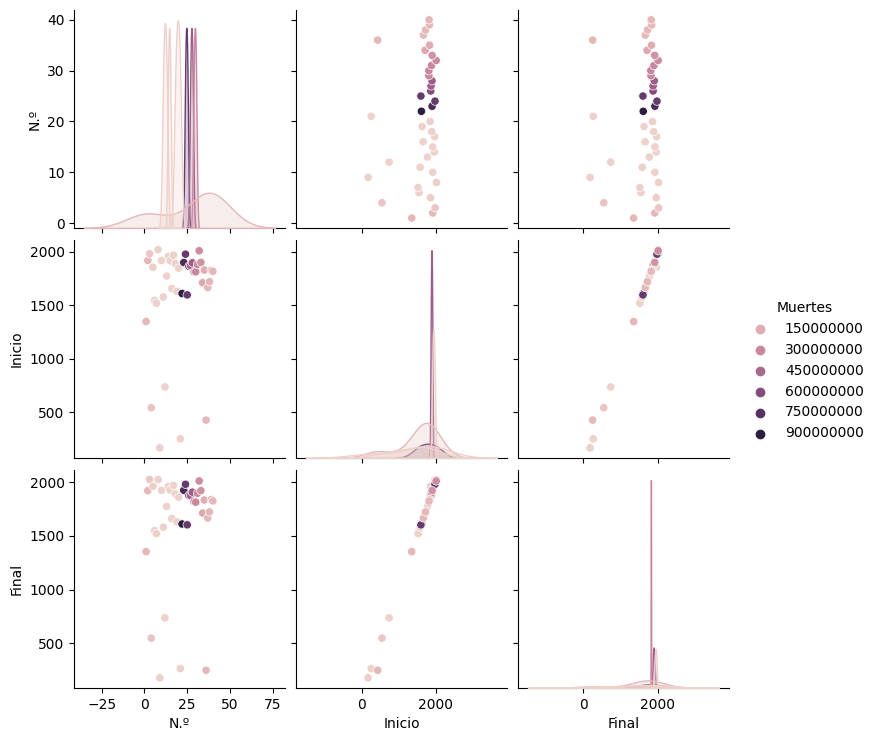

In [56]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Muertes")

In [57]:
# Seleccción de variables significativas
# sel_data = data[['Inicio','Final','Muertes']]
sel_data = data[['Inicio', 'Final','Muertes']]
sel_data

,Inicio,Final,Muertes
0,1347.0,1353.0,100000000.0
1,1918.0,1920.0,100000000.0
2,1981.0,2023.0,40000000.0
3,541.0,549.0,50000000.0
4,1855.0,1960.0,15000000.0
5,1545.0,1548.0,13.5
6,1519.0,1520.0,8000000.0
7,2019.0,2023.0,6900000.0
8,165.0,180.0,5000000.0
9,1918.0,1922.0,3000000.0


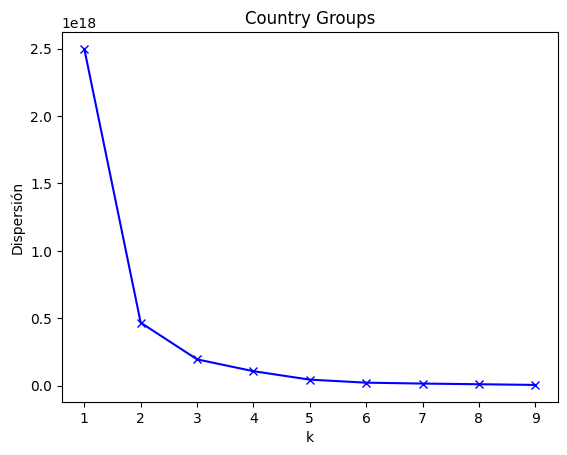

In [58]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Country Groups')

In [59]:
data.describe()

,N.º,Inicio,Final,Muertes
count,40.000000,40.000000,40.000000,4.000000e+01
mean,20.500000,1627.925000,1633.000000,1.822450e+08
std,11.690452,490.198776,503.371607,2.530672e+08
min,1.000000,165.000000,180.000000,1.350000e+01
25%,10.750000,1605.750000,1608.000000,2.000000e+06
50%,20.500000,1821.500000,1828.500000,1.000000e+08
75%,30.250000,1899.250000,1920.500000,2.876500e+08
max,40.000000,2019.000000,2023.000000,9.000000e+08
